Project: Uber Data Analysis
1) Importing the libraries
2) Loading the dataset 
3) Data cleaning and Data preprocessing
4) Exploratory data analysis

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# read the file 

x = pd.read_csv("my_uber_drives_2016.csv")

In [5]:
# Overview of the data
print(x)
print()
print(x.head)
print()
print(x.tail)
print()
print(x.shape)
print()
print(x.columns)

           START_DATE*         END_DATE* CATEGORY*            START*  \
0       1/1/2016 21:11    1/1/2016 21:17  Business       Fort Pierce   
1        1/2/2016 1:25     1/2/2016 1:37  Business       Fort Pierce   
2       1/2/2016 20:25    1/2/2016 20:38  Business       Fort Pierce   
3       1/5/2016 17:31    1/5/2016 17:45  Business       Fort Pierce   
4       1/6/2016 14:42    1/6/2016 15:49  Business       Fort Pierce   
...                ...               ...       ...               ...   
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Kar?chi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   
1155            Totals               NaN       NaN               NaN   

                 STOP*   MILES*         PURPOSE*  
0          Fort Pierce      5.1   Meal/Entertain  
1          Fort Pierce      5.0  

In [6]:
"""Lets start claning the column names without having * at the end."""

# here x.columns means "columns" are the index/series of x and is converted to string using "str" and replaced by "replace"
x.columns = x.columns.str.replace("*","")   # string.replaces("x","y") --> replaces in string itself & it does not take "inplace" argument
print(x.columns)
print(x)

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')
            START_DATE          END_DATE  CATEGORY             START  \
0       1/1/2016 21:11    1/1/2016 21:17  Business       Fort Pierce   
1        1/2/2016 1:25     1/2/2016 1:37  Business       Fort Pierce   
2       1/2/2016 20:25    1/2/2016 20:38  Business       Fort Pierce   
3       1/5/2016 17:31    1/5/2016 17:45  Business       Fort Pierce   
4       1/6/2016 14:42    1/6/2016 15:49  Business       Fort Pierce   
...                ...               ...       ...               ...   
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Kar?chi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   
1155            Totals               NaN       NaN               NaN   

                  STOP 

In [8]:
"""Now, lets see how many NaN values are present in the data and where are they"""

print(x.isnull().sum())                                      # total no. NaN in each column
print(x.isnull().sum().sum())                                # total no. od NaN in the data
print((x["PURPOSE"].isnull().sum()/x.shape[0])*100)        # gives how much percentage of "PURPOSE" column is NaN values --> (503/1156)*100

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64
507
43.5121107266436


In [9]:
"""Now, lets first solve NaN value columns which has least NaN values."""

print(x[x["END_DATE"].isnull()])     # same row
print(x[x["CATEGORY"].isnull()])     # same row 
print(x[x["START"].isnull()])        # same row 
print(x[x["STOP"].isnull()])         # same row

     START_DATE END_DATE CATEGORY START STOP    MILES PURPOSE
1155     Totals      NaN      NaN   NaN  NaN  12204.7     NaN
     START_DATE END_DATE CATEGORY START STOP    MILES PURPOSE
1155     Totals      NaN      NaN   NaN  NaN  12204.7     NaN
     START_DATE END_DATE CATEGORY START STOP    MILES PURPOSE
1155     Totals      NaN      NaN   NaN  NaN  12204.7     NaN
     START_DATE END_DATE CATEGORY START STOP    MILES PURPOSE
1155     Totals      NaN      NaN   NaN  NaN  12204.7     NaN


In [10]:
"""If we see above 1155 row, every column  is has NaN. So, it will be no problem to remove that 1 row."""

x.dropna(axis=0,how="all",subset=["END_DATE","CATEGORY","START","STOP"],inplace=True)     # how="all" --> row where all the given subsets have NaN will be deleted  [or]  dropna(axis=0,how="any",subset=["END_DATE"])
print(x.isnull().sum())

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64


In [11]:
"""Now, lets solve the "PURPOSE" NaN values"""

x["PURPOSE"].fillna(method="ffill",inplace=True)
print(x.isnull().sum())

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64


In [12]:
"""Now, lets check the types of all the values in the column and do math to the non-object columns"""

print(x.info())         # info() --> shows the type values in each column 
print(x.describe())     # describes the non-object values

# in above "MILES" column there is obviously are outliers

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB
None
             MILES
count  1155.000000
mean     10.566840
std      21.579106
min       0.500000
25%       2.900000
50%       6.000000
75%      10.400000
max     310.300000


In [13]:
"""Now, lets start with "START_DATE & END_DATE ,i.e, convert the object to datetime format"""

# pd.to_datetime(column_name,format="") --> converts objects/strings into datetime.

# 1) if you want the string(object) format (YYYY/MM/DD), then format="%Y/%m/%d" can be used.
# 2) if you want the string(object) format "yyyymmdd", then format='%y%m%d' can be used.
# errors= --> "coerce" --> when a column throws error (when invalid input) then give "NaT" and continue the running of program.

# If you don't want format the datetime, just leave it and just convert "START_DATE" into "datetime" which can be formattable..

x["START_DATE"] = pd.to_datetime(x["START_DATE"],format="%m/%d/%Y %H:%M",errors="coerce")
x["END_DATE"] = pd.to_datetime(x["END_DATE"],format="%m/%d/%Y %H:%M",errors="coerce")
print(x[["START_DATE","END_DATE"]])

              START_DATE            END_DATE
0    2016-01-01 21:11:00 2016-01-01 21:17:00
1    2016-01-02 01:25:00 2016-01-02 01:37:00
2    2016-01-02 20:25:00 2016-01-02 20:38:00
3    2016-01-05 17:31:00 2016-01-05 17:45:00
4    2016-01-06 14:42:00 2016-01-06 15:49:00
...                  ...                 ...
1150 2016-12-31 01:07:00 2016-12-31 01:14:00
1151 2016-12-31 13:24:00 2016-12-31 13:42:00
1152 2016-12-31 15:03:00 2016-12-31 15:38:00
1153 2016-12-31 21:32:00 2016-12-31 21:50:00
1154 2016-12-31 22:08:00 2016-12-31 23:51:00

[1155 rows x 2 columns]


In [14]:
"""There is some data cleaning but let start with the data analysis.
Q) what is the most frequent start location?"""

print(x.groupby(["START"])["MILES"].count())          # gives the count() of each place (not repeated, as it is grouped by groupby()) in just "MILES" column
print(x.groupby(["START"]).count())                   # gives the count() of each place (not repeated, as it is grouped by groupby()) in all the columns except "START"
print(x.groupby(["START"])["START"].count())          # x.count() --> counts the no. of times it repeates
print(x.groupby(["START"])["START"].count().max())  

# [OR]     ** MOST USED METHOD**
print(x["START"].value_counts())           # x.value.counts() --> gives the count of each column in decesnding order.

START
Agnew               4
Almond              1
Apex               17
Arabi               1
Arlington           1
                   ..
West University     2
Weston              2
Westpark Place     17
Whitebridge        68
Winston Salem       1
Name: MILES, Length: 177, dtype: int64
                 START_DATE  END_DATE  CATEGORY  STOP  MILES  PURPOSE
START                                                                
Agnew                     4         4         4     4      4        4
Almond                    1         1         1     1      1        1
Apex                     17        17        17    17     17       17
Arabi                     1         1         1     1      1        1
Arlington                 1         1         1     1      1        1
...                     ...       ...       ...   ...    ...      ...
West University           2         2         2     2      2        2
Weston                    2         2         2     2      2        2
Westpark Plac

START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: count, dtype: int64


<Axes: xlabel='START'>

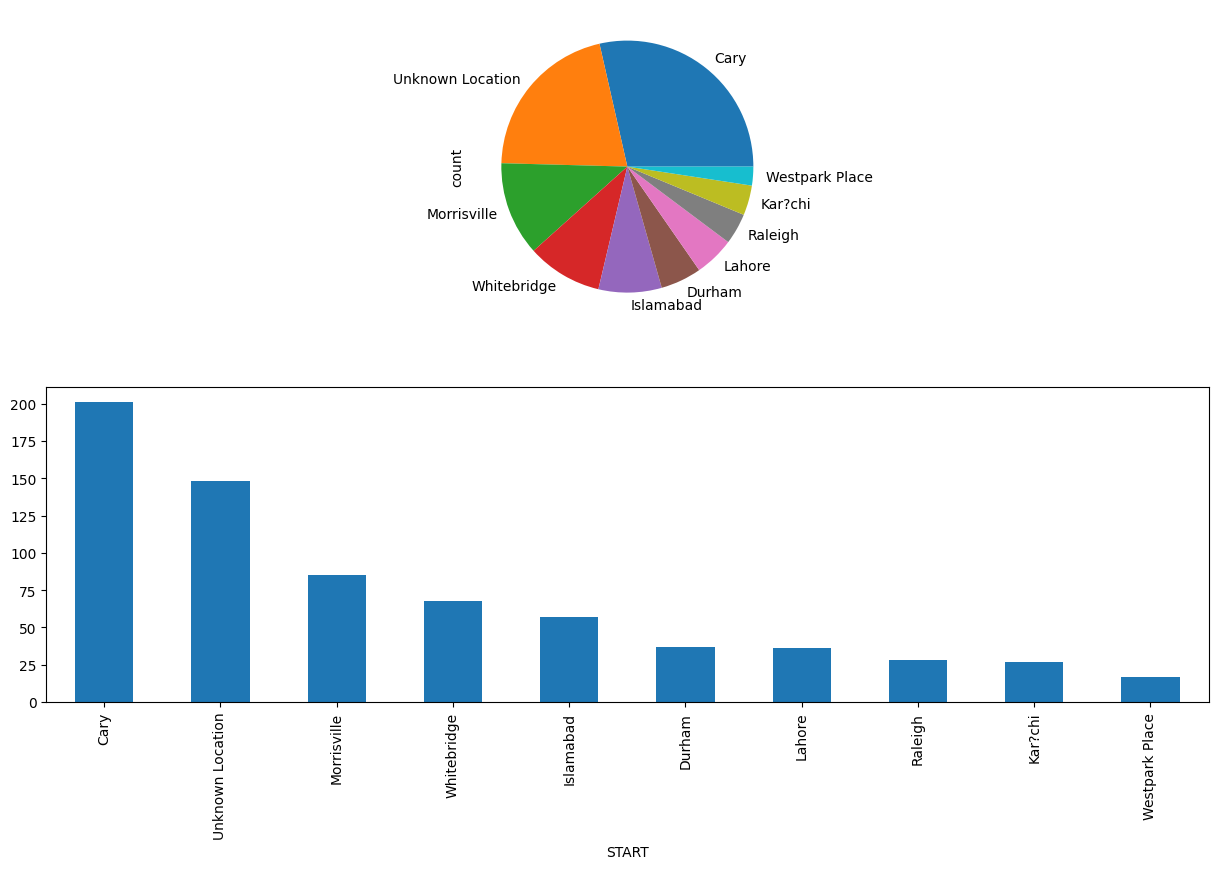

In [22]:
"""Q) find the top 10 most frequent start location"""

print(x["START"].value_counts().head(10))

plt.figure(figsize=(15,9))         # to zoom
plt.subplot(2,1,1)
x["START"].value_counts().head(10).plot(kind="pie")    # if you want to plot in a pie chart
plt.subplot(2,1,2)
x["START"].value_counts().head(10).plot(kind="bar")     # if you want to plot in a bar chart

<Axes: xlabel='STOP'>

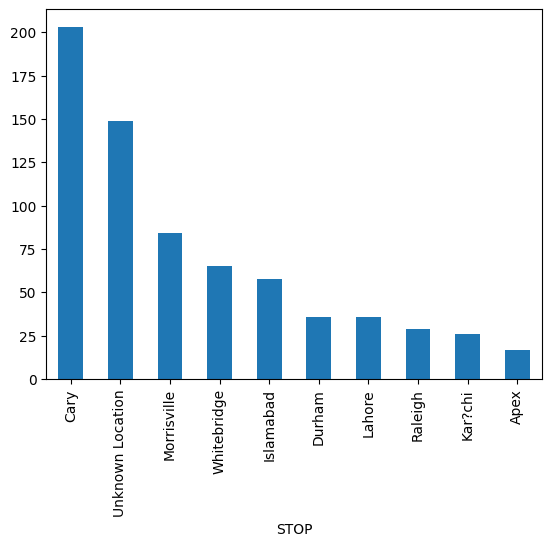

In [23]:
"""Same as that find the most 10 frequent stop point location as well"""

x["STOP"].value_counts().head(10)
x["STOP"].value_counts().head(10).plot(kind="bar")

<Axes: xlabel='PURPOSE'>

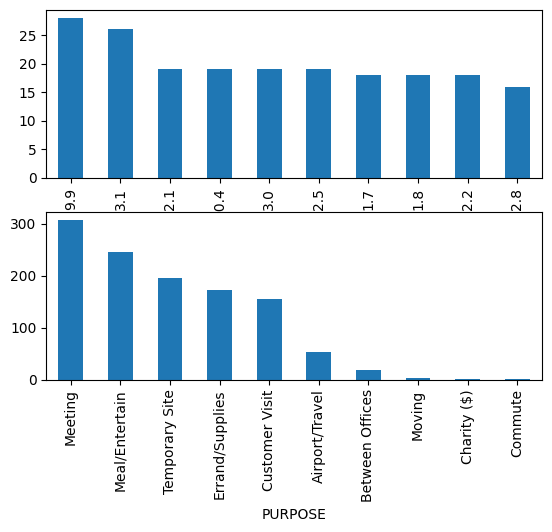

In [27]:
"""Q) Usually people are booking for how many miles"""

x["MILES"].value_counts().head(10)
plt.subplot(2,1,1)
x["MILES"].value_counts().head(10).plot(kind="bar")

# [ALSO]

x["PURPOSE"].value_counts()
plt.subplot(2,1,2)
x["PURPOSE"].value_counts().head(10).plot(kind="bar")

<Axes: xlabel='PURPOSE', ylabel='count'>

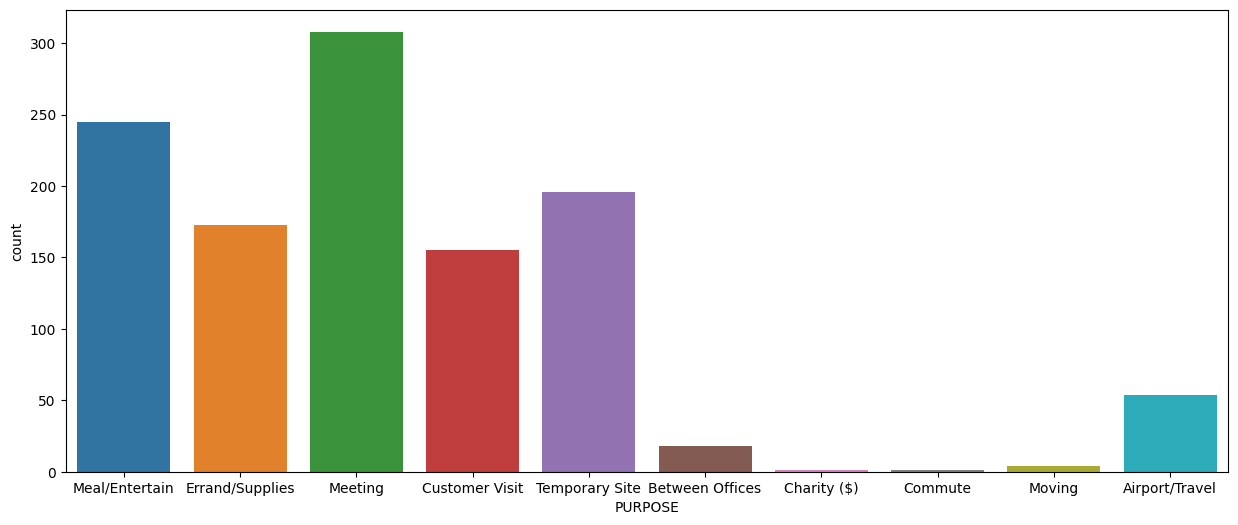

In [28]:
"""How we can customize the bar picture. It can de done with seaborn"""

plt.figure(figsize=(15,6))            # figure(figsize=(row_width,column_width))  --> used when names of 1 column catagories merges themselves due to no space.
sns.countplot(x=x["PURPOSE"],data=x)

<Axes: xlabel='CATEGORY', ylabel='count'>

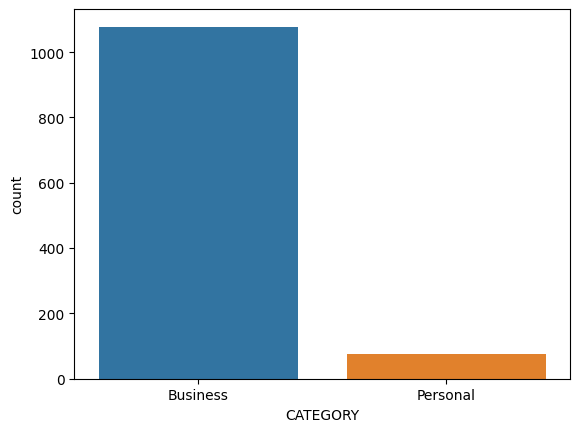

In [29]:
"""Now, lets see the countplot for catagory column"""

sns.countplot(x=x["CATEGORY"],data=x)

Q) make new columns of 
1) find duration of trip
2) find no. of round trips (startloc=stoploc)
3) months majority booking is done

In [32]:
# Adding of new Columns -->
# 1) x[column_name] = [values] --> adds at last
# 2) x.insert(column_index,column_name,[values]) --> adds at given position

x["MINUTES"] = x["END_DATE"] - x["START_DATE"]         # As the datetime is in the format, we can do arithmatic operations on them
# lets make it that only minutes are shown.
x["MINUTES"] = x.MINUTES.dt.total_seconds()/60      # converts "x.MINUTES", a series which has attribute "dt" into seconds using total_seconds() method and divide by 60 to get minutes.
 
 # Subquestions: create dataframe with 4 columns pur,mil,min mil, max, mil
 
# agg() method allows you to apply a function or a list of function names to be executed along one of the axis of the DataFrame, default 0, which is the index (row) axis.
# reset_index()  --> makes it to the default index format instead of some column acting as index which can be done by "set_index()" 
x.groupby(["PURPOSE"]).agg({"MILES":["mean","max","min"]}).reset_index()

# [OR]
# pd.DataFrame({"MEAN": x.groupby(["PURPOSE"])["MILES"].mean(),
#              "MAX": x.groupby(["PURPOSE"])["MILES"].max(),
#              "MIN": x.groupby(["PURPOSE"])["MILES"].min()}).reset_index()

PURPOSE       MILES              
                          mean    max    min
0   Airport/Travel   14.953704  156.9    0.9
1  Between Offices   10.944444   39.2    1.9
2      Charity ($)   15.100000   15.1   15.1
3          Commute  180.200000  180.2  180.2
4   Customer Visit   16.065806  310.3    0.6
5  Errand/Supplies    5.928902  195.3    0.5
6   Meal/Entertain    5.773878   36.5    0.6
7          Meeting   12.652597  201.0    0.7
8           Moving    4.550000    6.1    3.3
9   Temporary Site   11.016327  195.6    0.7

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3560\3808998159.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

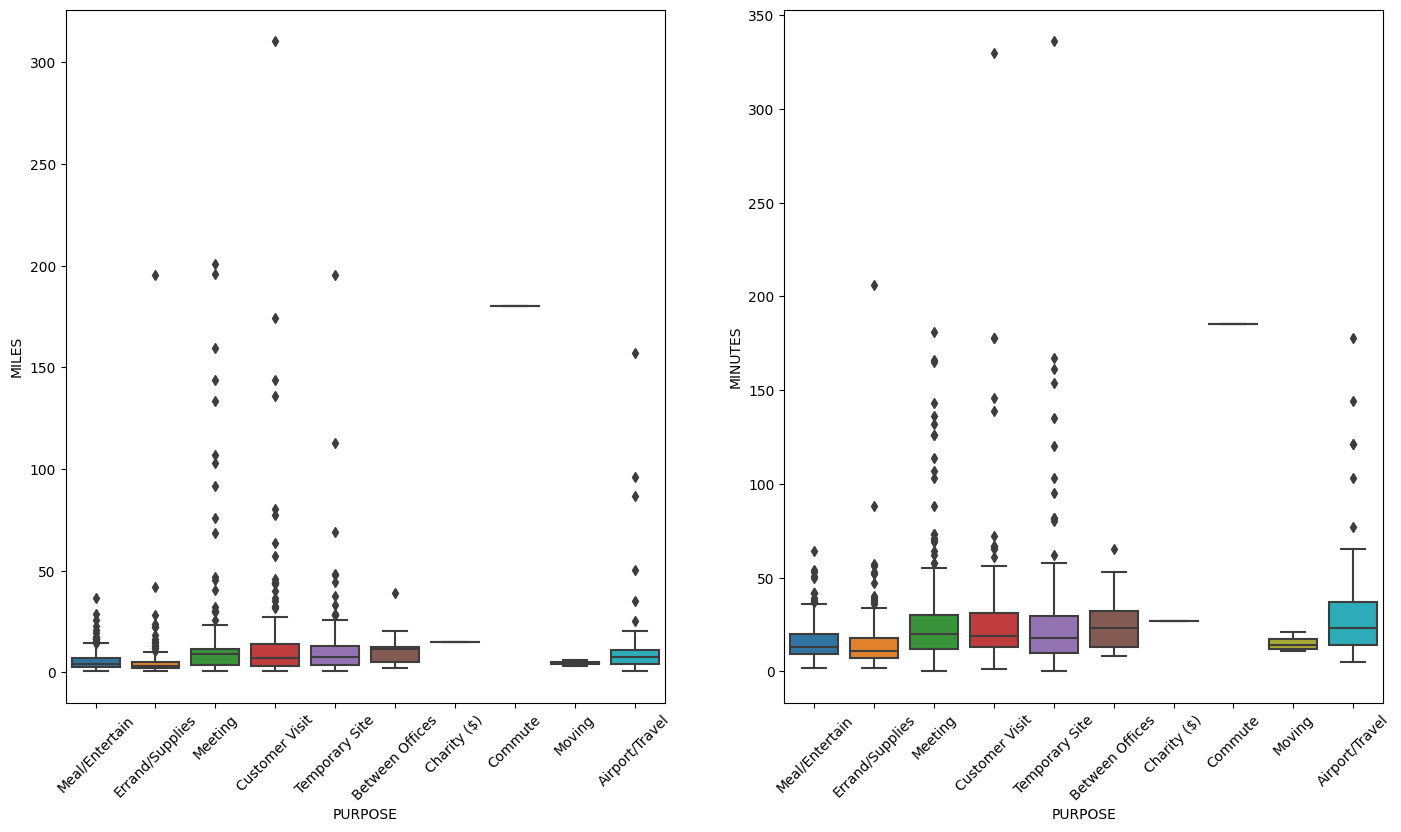

In [33]:
# Now, lets do the plot of above.
plt.figure(figsize=(17,9))       # [ALWAYS TOP OF FIGURE] here even if we give space by increasing size, we are getting merges.
plt.xticks(rotation=45)          
plt.subplot(1,2,1)
sns.boxplot(x=x["PURPOSE"],y=x["MILES"],data=x)
plt.xticks(rotation=45)           # xticks() --> can rotate ticks/labels of x axis in any angles.
plt.subplot(1,2,2)
sns.boxplot(x=x["PURPOSE"],y=x["MINUTES"],data=x)    
plt.xticks(rotation=45) 

<Axes: xlabel='ROUND_TRIPS', ylabel='count'>

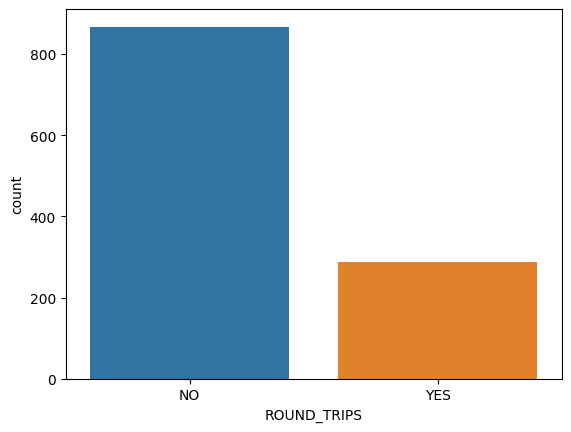

In [34]:
"""[AND]"""

x[x["START"] == x["STOP"]].value_counts().sum()      # gives total no. of rounders

# Now, to make column lets define a function

def round(x):
    if x["START"] == x["STOP"]:
        return "YES"
    else:
        return "NO"
    
x["ROUND_TRIPS"] = x.apply(round,axis=1)     # apply() --> helps to apply functions in each columns

# lets make a plot for it
sns.countplot(x=x["ROUND_TRIPS"],order=x["ROUND_TRIPS"].value_counts().index,data=x)    # order= --> sorts the values in decending order. 'value_counts" gives already the decending order and ".index" means take the index of it i.e, lables but not values

In [36]:
"""[AND]"""

x["MONTH"] = pd.DatetimeIndex(x["START_DATE"]).month    # .month --> converts to month 

# Now, lets conver month no. to month names

dic = {1:"JANUARY",2:"FEBUARY",3:"MARCH",4:"APRIL",5:"MAY",6:"JUNE",7:"JULY",8:"AUGUST",9:"SEPTEMBER",10:"OCTOBER",11:"NOVEMBER",12:"DECEMBER"}

x["MONTH"] = x["MONTH"].map(dic)    # map() --> Map values of Series according to an input mapping or function.

print(x)

              START_DATE            END_DATE  CATEGORY             START  \
0    2016-01-01 21:11:00 2016-01-01 21:17:00  Business       Fort Pierce   
1    2016-01-02 01:25:00 2016-01-02 01:37:00  Business       Fort Pierce   
2    2016-01-02 20:25:00 2016-01-02 20:38:00  Business       Fort Pierce   
3    2016-01-05 17:31:00 2016-01-05 17:45:00  Business       Fort Pierce   
4    2016-01-06 14:42:00 2016-01-06 15:49:00  Business       Fort Pierce   
...                  ...                 ...       ...               ...   
1150 2016-12-31 01:07:00 2016-12-31 01:14:00  Business           Kar?chi   
1151 2016-12-31 13:24:00 2016-12-31 13:42:00  Business           Kar?chi   
1152 2016-12-31 15:03:00 2016-12-31 15:38:00  Business  Unknown Location   
1153 2016-12-31 21:32:00 2016-12-31 21:50:00  Business        Katunayake   
1154 2016-12-31 22:08:00 2016-12-31 23:51:00  Business           Gampaha   

                  STOP  MILES          PURPOSE  MINUTES ROUND_TRIPS     MONTH  
0      

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'DECEMBER'),
  Text(1, 0, 'AUGUST'),
  Text(2, 0, 'NOVEMBER'),
  Text(3, 0, 'FEBUARY'),
  Text(4, 0, 'MARCH'),
  Text(5, 0, 'JULY'),
  Text(6, 0, 'JUNE'),
  Text(7, 0, 'OCTOBER'),
  Text(8, 0, 'JANUARY'),
  Text(9, 0, 'APRIL'),
  Text(10, 0, 'MAY'),
  Text(11, 0, 'SEPTEMBER')])

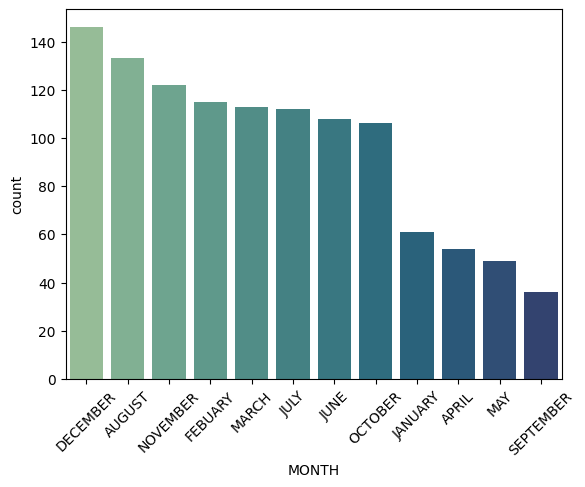

In [37]:
"""Q) Create barplot cab booking frequency over months(in a way month higher cab comes first) """

# Pallete= --> gives the color maps to the bars. eg: default, crest, coolwarm..

sns.countplot(x=x["MONTH"],order=x["MONTH"].value_counts().index,palette="crest",data=x)      # order= --> sorts the values in decending order. 'value_counts" gives already the decending order and ".index" means take the index of it i.e, lables but not values
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'JANUARY'),
  Text(1, 0, 'FEBUARY'),
  Text(2, 0, 'MARCH'),
  Text(3, 0, 'APRIL'),
  Text(4, 0, 'MAY'),
  Text(5, 0, 'JUNE'),
  Text(6, 0, 'JULY'),
  Text(7, 0, 'AUGUST'),
  Text(8, 0, 'SEPTEMBER'),
  Text(9, 0, 'OCTOBER'),
  Text(10, 0, 'NOVEMBER'),
  Text(11, 0, 'DECEMBER')])

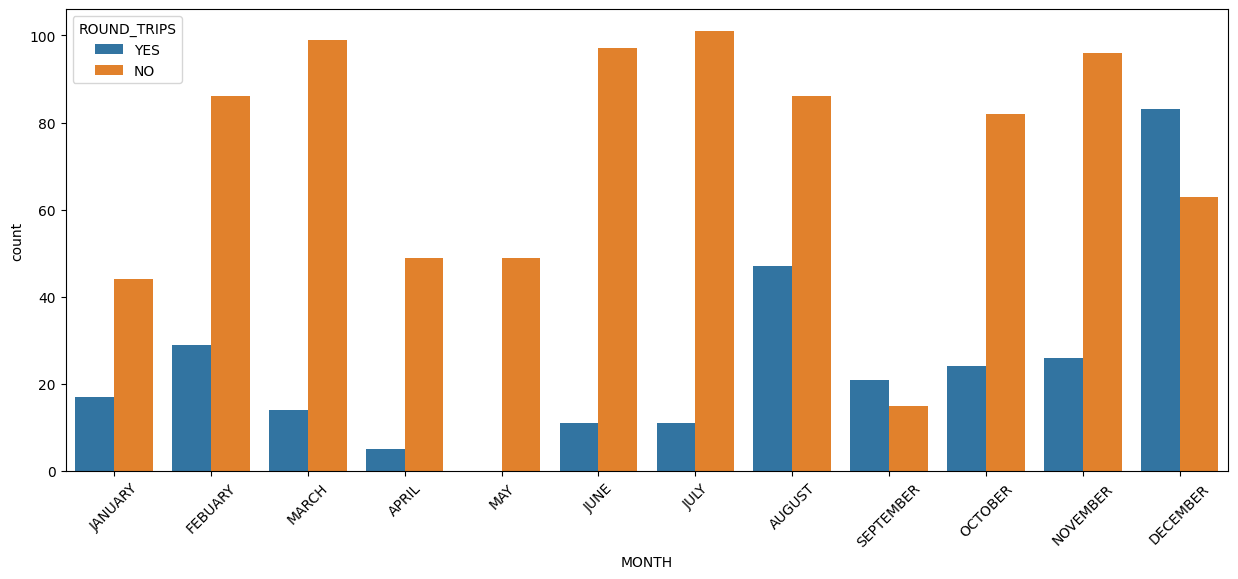

In [38]:
"""Q) analysis of which month the round trips are bookes"""

plt.figure(figsize=(15,6))          # can increase/ decrease length(row)/width(column) of the figure
sns.countplot(x=x["MONTH"],hue=x["ROUND_TRIPS"],data=x,)
plt.xticks(rotation=45)

Text(0, 0.5, 'MINUTES')

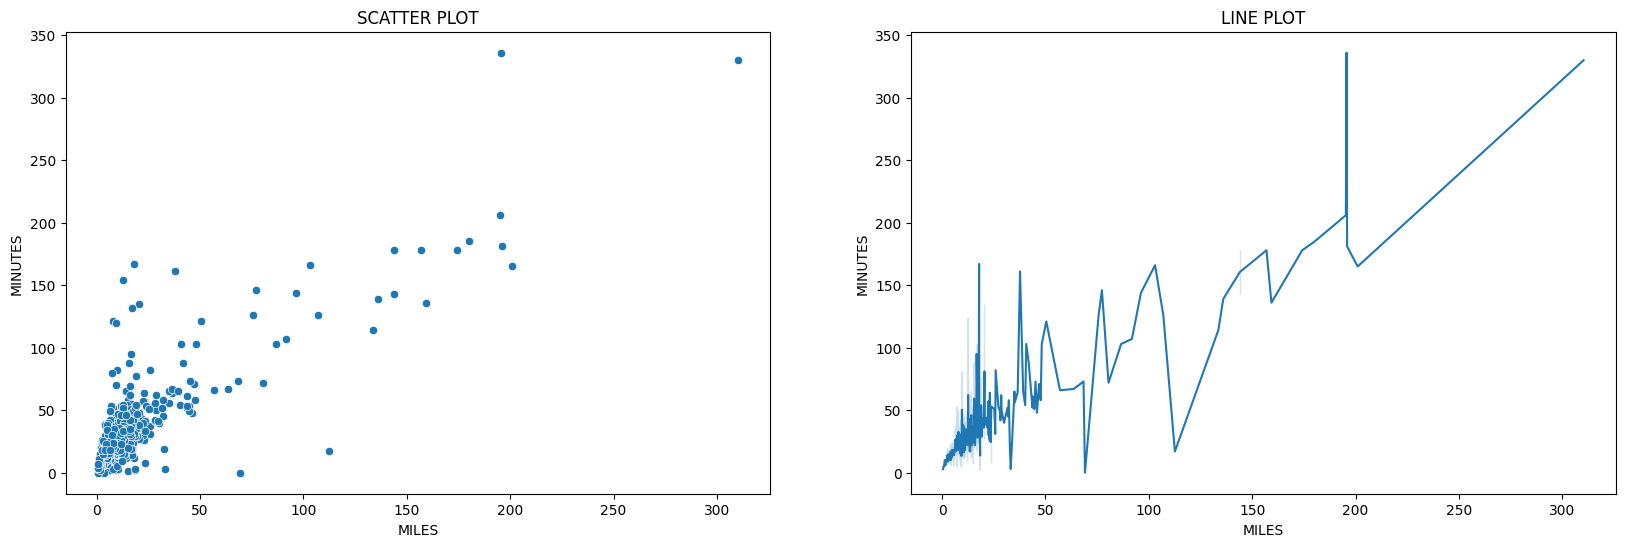

In [39]:
"""Q) subplot of line and scatter plots of miles vs minutes"""

# can do with matplotlib too but scatterplot --> scatter & lineplot --> line. 
# Always use seaborn for creating plots as it is more visualizing and user-friendly.

plt.figure(figsize=(20,6))          # zooms out
plt.subplot(1,2,1)
sns.scatterplot(x=x["MILES"],y=x["MINUTES"],data=x)     # sns.scatterplot(x,y,size="size_of_marker",marker="marker_type",data=) 
plt.title("SCATTER PLOT")
plt.xlabel("MILES")
plt.ylabel("MINUTES")

plt.subplot(1,2,2)
sns.lineplot(x=x["MILES"],y=x["MINUTES"],data=x)
plt.title("LINE PLOT")
plt.xlabel("MILES")
plt.ylabel("MINUTES")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

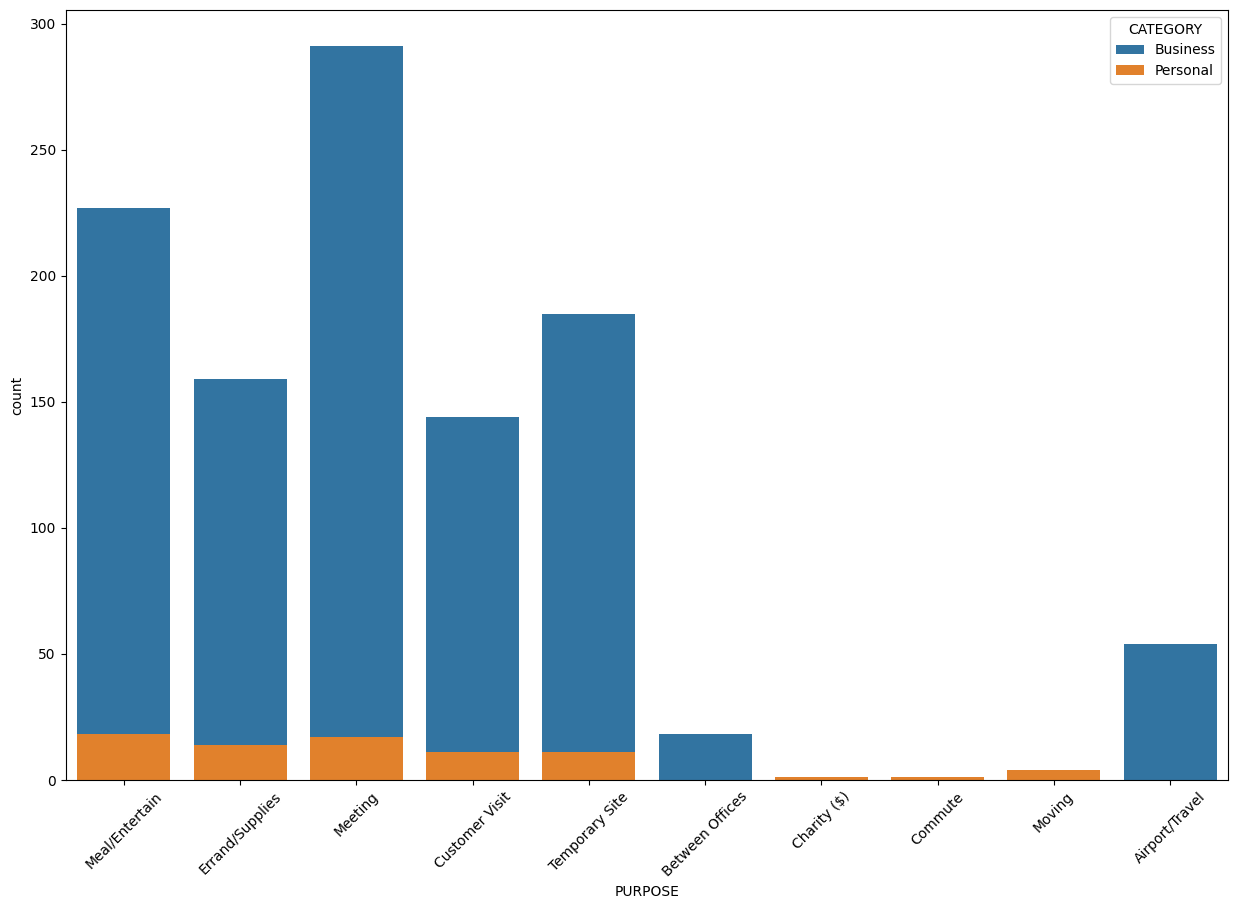

In [40]:
"""countplot --> dodge= --> compares 2 variables by "hue" in same bin/bar """

plt.figure(figsize=(15,10))
sns.countplot(x=x["PURPOSE"],hue=x["CATEGORY"],dodge=False,data=x)
plt.xticks(rotation=45)

<Axes: xlabel='CATEGORY', ylabel='MILES'>

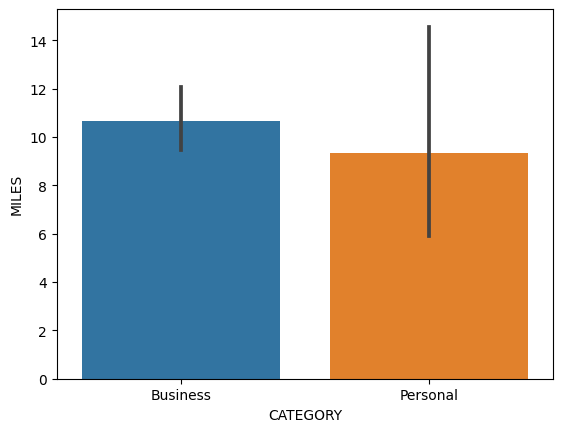

In [42]:
"""Q) which catagory is travelling for more distance"""

# x.groupby(["CATEGORY"])["MILES"].sum()   --> gives tabular form of below barplot with numerics

sns.barplot(x=x["CATEGORY"],y=x["MILES"],data=x)

# [OR]
# x.groupby(["CATEGORY"])["MILES"].mean().plot(kind="bar")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

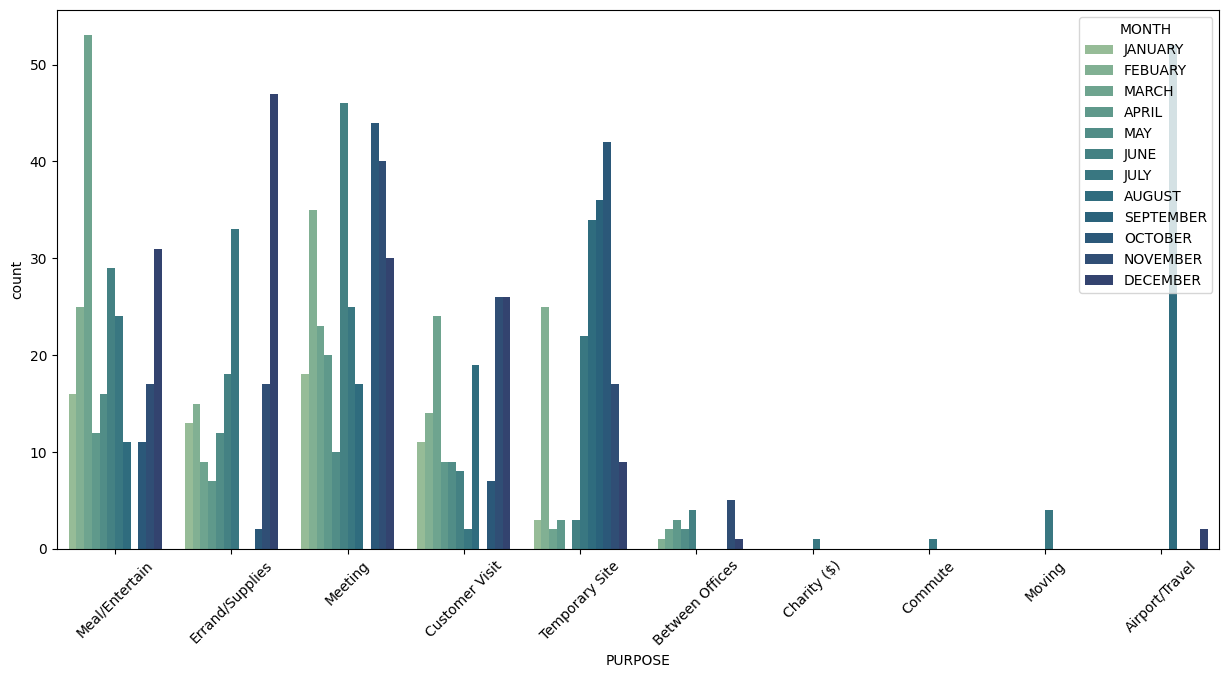

In [43]:
"""Q) purpose of trips in particular months"""

plt.figure(figsize=(15,7))
sns.countplot(x=x["PURPOSE"],hue=x["MONTH"],palette="crest",data=x)
plt.xticks(rotation=45)

# .rename({}"MILES":"distance"},axis=1) --> renames the column easily of a given DataFrame

<Axes: xlabel='DAY_SLOTS', ylabel='count'>

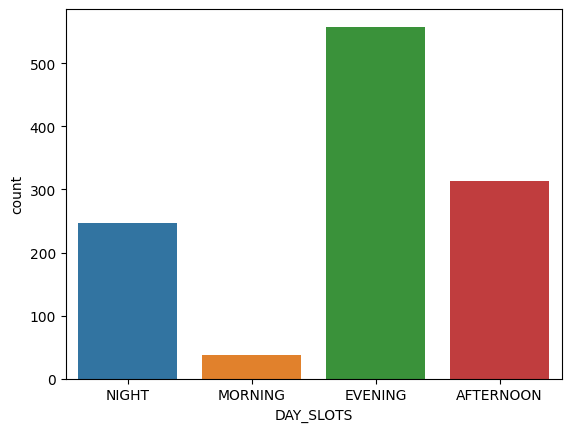

In [44]:
"""Q) time where majority of cabs are booked"""

x["DAY_HOUR"] = pd.DatetimeIndex(x["START_DATE"]).hour           # .hour --> converts datetimeindex to hour

def time(x):
    if 6 >= x["DAY_HOUR"] < 12:
        return "MORNING"
    elif 12 >= x["DAY_HOUR"] < 18:
        return "AFTERNOON"
    elif 18 >= x["DAY_HOUR"] < 24:
        return "EVENING"
    else:
        return "NIGHT"

x["DAY_SLOTS"] = x.apply(time,axis=1)         # apply() --> used to apply functions to the DataFrame columns (not Series/list but 1 column dictionary)

sns.countplot(x=x["DAY_SLOTS"],data=x)

FINAL REPORT:
 1)Ccabs are usually booked for business categor.y2 2M more round trips are done in month of d.e3  C) cary is most frequent start po.i4  C4) cary is most frequent stop p.o5  L 5) location with least booking can be offered a discount co.u6
 M  6) more bookings are done in the january. 7
M   7) majority of trips are no.t8dA    8) airport bookings are only for busine.s9ssC
    9) charity, commute and moving is only for persona.l10seM
    10) majority of cabs are booked for meeti.n11osB
    11) business trips are for long.e12anFe
    12) for cab bookings seasonal pattern. 13erEed
    13) evening has max bookings and morning has.kings
    """